In this script, we combine the frequency results for the localized and delocalized input.

In [1]:
import torch
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator # Import MaxNLocator


plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman", "DejaVu Serif", "Bitstream Vera Serif"],
    "mathtext.fontset": "cm"
})

In [2]:
# --- Load data for delocalized input ---
input_type_delocalized = 'delocalized'
mu = "0.0"
folder_loc_delocalized = f'/scratch/sr6364/perturbed_organics/data/adaptive_phase_diagram_100_large_delta/{input_type_delocalized}'
folder_name_delocalized = f'{input_type_delocalized}_goe_symmetric_N_100_s_100_mu_{mu}_num_delta_200_num_input_200_num_trials_100_b0_1.0_b1_1.0_phase_diagram_log-scale'
path_delocalized = os.path.join(folder_loc_delocalized, folder_name_delocalized)

param_file_path_delocalized = os.path.join(path_delocalized, 'parameters.json')
with open(param_file_path_delocalized, 'r') as f:
    params_delocalized = json.load(f)
delta_scale_delocalized = params_delocalized['delta_scale']
delta_range_delocalized = np.array(params_delocalized['delta_range'])
input_range_delocalized = np.array(params_delocalized['input_range'])

eigvals_delocalized = torch.load(os.path.join(path_delocalized, f'eigvals_J.pt'))
nan_in_slice_mask_delocalized = torch.any(torch.isnan(eigvals_delocalized), dim=3)
max_freq_each_trial_delocalized = (1 / (2 * np.pi)) * torch.max(torch.abs(eigvals_delocalized.imag), dim=3)[0]
max_freq_each_trial_delocalized = torch.where(nan_in_slice_mask_delocalized, torch.nan, max_freq_each_trial_delocalized)
max_freq_avg_delocalized = torch.nanmean(max_freq_each_trial_delocalized, dim=2).numpy()

# --- Load data for localized input ---
input_type_localized = 'localized'
folder_loc_localized = f'/scratch/sr6364/perturbed_organics/data/adaptive_phase_diagram_100_large_delta/{input_type_localized}'
folder_name_localized = f'{input_type_localized}_goe_symmetric_N_100_s_100_mu_{mu}_num_delta_200_num_input_200_num_trials_100_b0_1.0_b1_1.0_phase_diagram_log-scale'
path_localized = os.path.join(folder_loc_localized, folder_name_localized)

param_file_path_localized = os.path.join(path_localized, 'parameters.json')
with open(param_file_path_localized, 'r') as f:
    params_localized = json.load(f)
delta_scale_localized = params_localized['delta_scale']
delta_range_localized = np.array(params_localized['delta_range'])
input_range_localized = np.array(params_localized['input_range'])

eigvals_localized = torch.load(os.path.join(path_localized, f'eigvals_J.pt'))
nan_in_slice_mask_localized = torch.any(torch.isnan(eigvals_localized), dim=3)
max_freq_each_trial_localized = (1 / (2 * np.pi)) * torch.max(torch.abs(eigvals_localized.imag), dim=3)[0]
max_freq_each_trial_localized = torch.where(nan_in_slice_mask_localized, torch.nan, max_freq_each_trial_localized)
max_freq_avg_localized = torch.nanmean(max_freq_each_trial_localized, dim=2).numpy()

In [3]:
folder_loc = f'../figures/mu_{mu}/fig_freq_lines'
os.makedirs(folder_loc, exist_ok=True)

In [4]:
# --- Plot frequency vs. Delta at fixed z ---
z_line_val = 0.05
delta_line_val = 0.02

z_index_delocalized = np.argmin(np.abs(input_range_delocalized - z_line_val))
actual_z_delocalized = input_range_delocalized[z_index_delocalized]
freq_vs_delta_delocalized = max_freq_avg_delocalized[:, z_index_delocalized]

z_index_localized = np.argmin(np.abs(input_range_localized - z_line_val))
actual_z_localized = input_range_localized[z_index_localized]
freq_vs_delta_localized = max_freq_avg_localized[:, z_index_localized]

delta_index_delocalized = np.argmin(np.abs(delta_range_delocalized - delta_line_val))
actual_delta_delocalized = delta_range_delocalized[delta_index_delocalized]
freq_vs_z_delocalized = max_freq_avg_delocalized[delta_index_delocalized, :]

delta_index_localized = np.argmin(np.abs(delta_range_localized - delta_line_val))
actual_delta_localized = delta_range_localized[delta_index_localized]
freq_vs_z_localized = max_freq_avg_localized[delta_index_localized, :]

all_freq_data = np.concatenate([
    freq_vs_delta_delocalized,
    freq_vs_delta_localized,
    freq_vs_z_delocalized,
    freq_vs_z_localized
])

global_freq_min = np.nanmin(all_freq_data)
global_freq_max = np.nanmax(all_freq_data)

freq_range = global_freq_max - global_freq_min
padding = 0.05 * freq_range if freq_range > 0 else 0.1 # Add minimal padding if range is zero
common_y_min = max(0, global_freq_min - padding)
common_y_max = global_freq_max + padding

num_y_ticks = 4

/tmp/ipykernel_3377687/3977957680.py:4: UserWarning: You passed a edgecolor/edgecolors ('#3498db') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(delta_range_delocalized, freq_vs_delta_delocalized,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


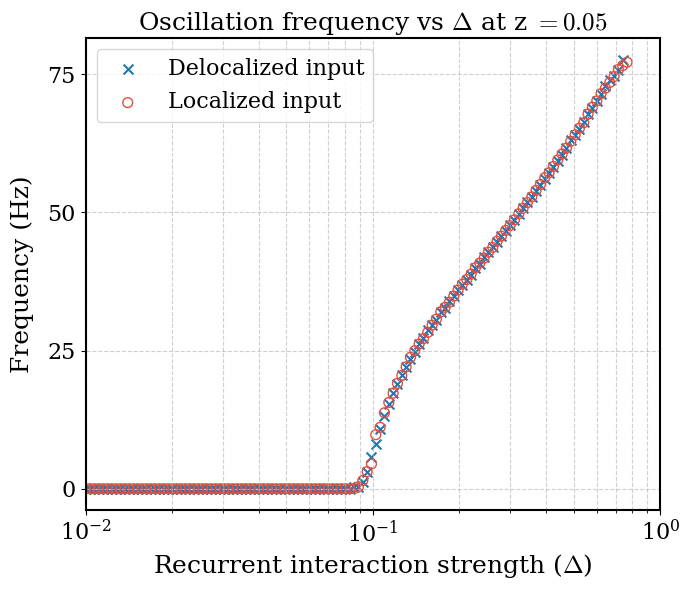

In [5]:
plt.figure(figsize=(7, 6)) # Set figure size

# Scatter plot for delocalized input
plt.scatter(delta_range_delocalized, freq_vs_delta_delocalized,
            marker='x', # Change marker to cross
            edgecolors='#3498db', # Set edge color (blue)
            s=50, # Set marker size
            label=f'Delocalized input') # Add label for legend

# Scatter plot for localized input
plt.scatter(delta_range_localized, freq_vs_delta_localized,
            facecolors='none', # Make circles hollow
            edgecolors='#e74c3c', # Set edge color (red/orange)
            s=50, # Set marker size
            label=f'Localized input') # Add label for legend

# --- Customize the plot ---
plt.xlabel(r'Recurrent interaction strength ($\Delta$)', fontsize=18) # Set x-axis label with LaTeX
plt.ylabel('Frequency (Hz)', fontsize=18, labelpad=10) # Set y-axis label
plt.title(rf'Oscillation frequency vs $\Delta$ at z $= {z_line_val:.2f}$', fontsize=18) # Set title with actual z value (formatted)
plt.xticks(fontsize=16) # Set x-tick font size
plt.yticks(fontsize=16) # Set y-tick font size and number of ticks


# Set x-axis limits as requested
plt.xlim(0.01, 1.0)

ax = plt.gca()
box_line_width = 1.5
for spine in ax.spines.values():
    spine.set_linewidth(box_line_width)

ax.yaxis.set_major_locator(MaxNLocator(nbins=num_y_ticks, integer=False)) # Use integer=False for non-integer frequencies if needed


# Apply log scale if specified (only checking delocalized setting for consistency)
if delta_scale_delocalized == 'log-scale':
    plt.xscale('log')

plt.grid(True, which='both', linestyle='--', alpha=0.6) # Add grid lines
plt.legend(fontsize=16) # Show legend
plt.tight_layout() # Adjust layout to prevent labels overlapping

# --- Save and show the plot ---
# Define the filename for saving the plot
file_name_vscan = f'freq_vs_delta_scatter_combined_z_{z_line_val}.png'
# Create the full path for saving
file_save_path_vscan = os.path.join(folder_loc, file_name_vscan)
# Save the figure
# Create the directory if it doesn't exist
os.makedirs(folder_loc, exist_ok=True)
plt.savefig(file_save_path_vscan, bbox_inches='tight')
plt.savefig(f'{file_save_path_vscan}.svg', format='svg', bbox_inches='tight', dpi=300)
plt.savefig(f'{file_save_path_vscan}.eps', format='eps', bbox_inches='tight', dpi=300)
# Display the plot
plt.show()

/tmp/ipykernel_3377687/3998046870.py:14: UserWarning: You passed a edgecolor/edgecolors ('#3498db') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(input_range_delocalized, freq_vs_z_delocalized,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


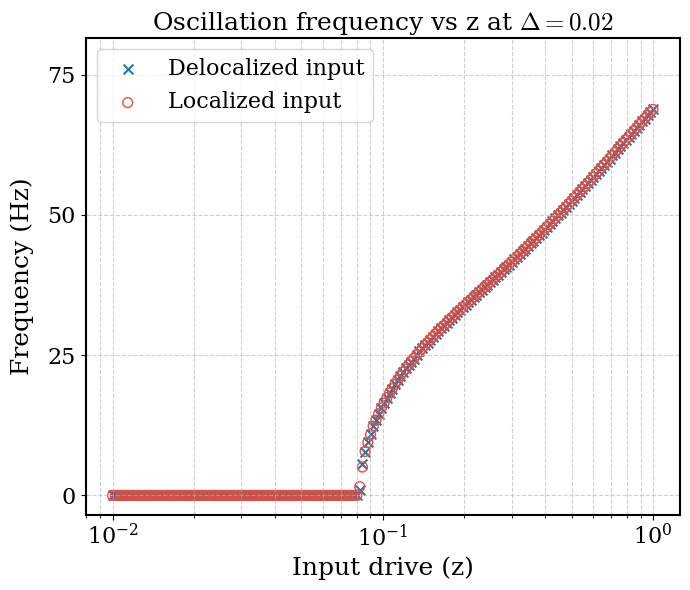

In [6]:

# --- Plot frequency vs. z at fixed Delta ---
delta_line_val = 0.02
delta_index_delocalized = np.argmin(np.abs(delta_range_delocalized - delta_line_val))
actual_delta_delocalized = delta_range_delocalized[delta_index_delocalized]
freq_vs_z_delocalized = max_freq_avg_delocalized[delta_index_delocalized, :]

delta_index_localized = np.argmin(np.abs(delta_range_localized - delta_line_val))
actual_delta_localized = delta_range_localized[delta_index_localized]
freq_vs_z_localized = max_freq_avg_localized[delta_index_localized, :]

plt.figure(figsize=(7, 6)) # Set figure size

# Scatter plot for delocalized input
plt.scatter(input_range_delocalized, freq_vs_z_delocalized,
            marker='x',           # Change marker to cross
            edgecolors='#3498db', # Set edge color (red/orange) - switched from original target code
            s=50,                 # Set marker size
            label=rf'Delocalized input') # Add label for legend

# Scatter plot for localized input
plt.scatter(input_range_localized, freq_vs_z_localized,
            facecolors='none',      # Make circles hollow
            edgecolors='#e74c3c',  # Set edge color (blue) - switched from original target code
            s=50,                   # Set marker size
            label=rf'Localized input') # Add label for legend

# --- Customize the plot ---
plt.xlabel('Input drive (z)', fontsize=18) # Set x-axis label
plt.ylabel('Frequency (Hz)', fontsize=18, labelpad=10) # Set y-axis label
plt.title(rf'Oscillation frequency vs z at $\Delta = {delta_line_val:.2f}$', fontsize=18) # Set title with target delta value
plt.xticks(fontsize=16) # Set x-tick font size
plt.yticks(fontsize=16) # Set y-tick font size

plt.ylim(top=common_y_max)


# Set plot box line width
ax = plt.gca()
box_line_width = 1.5
for spine in ax.spines.values():
    spine.set_linewidth(box_line_width)

# Control number of y-axis ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=4, integer=False)) # Use integer=False for non-integer frequencies

# Apply log scale to x-axis
plt.xscale('log')

plt.grid(True, which='both', linestyle='--', alpha=0.6) # Add grid lines
plt.legend(fontsize=16) # Show legend
plt.tight_layout() # Adjust layout to prevent labels overlapping

# --- Save and show the plot ---
# Define the filename for saving the plot
file_name_hscan = f'freq_vs_z_scan_combined_delta_{delta_line_val:.3f}.png'
# Create the full path for saving
file_save_path_hscan = os.path.join(folder_loc, file_name_hscan)
# Create the directory if it doesn't exist
os.makedirs(folder_loc, exist_ok=True)
# Save the figure
plt.savefig(file_save_path_hscan, bbox_inches='tight')
plt.savefig(f'{file_save_path_hscan}.svg', format='svg', bbox_inches='tight', dpi=300)
plt.savefig(f'{file_save_path_hscan}.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()